In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [3]:
# Import dataset 
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#Setiap gambar memiliki satu label saja. Nama kelas tidak tersedia dalam dataset, simpan nama kelas.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Eksplorasi Data
train_images.shape


(60000, 28, 28)

terdapat 60,000 gambar di dalam training set, setiap gambar berukuran 28 x 28 pixel.

In [6]:
len(train_labels)

60000

terdapat  60,000 label di dalam training set

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Setiap label adalah bilangan antara 0 dan 9

In [8]:
test_images.shape

(10000, 28, 28)

Terdapat 10,000 gambar di dalam test set yang direpresentasikan sebagai 28 x 28 pixel

In [9]:
len(test_labels)

10000

test set mengandung 10,000 label gambar

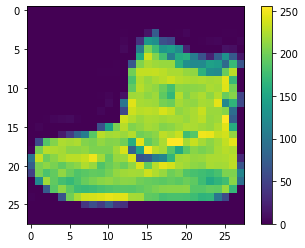

In [10]:
# Melakukan preprocessing terhadap data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

nilai pixel dari gambar memiliki rentang antara 0 sampai dengan 255

In [11]:
# Nilai pixel diubah menjadi rentang 0 sampai dengan 1 dengan membagi nilai tersebut dengan 255
train_images = train_images / 255.0

test_images = test_images / 255.0

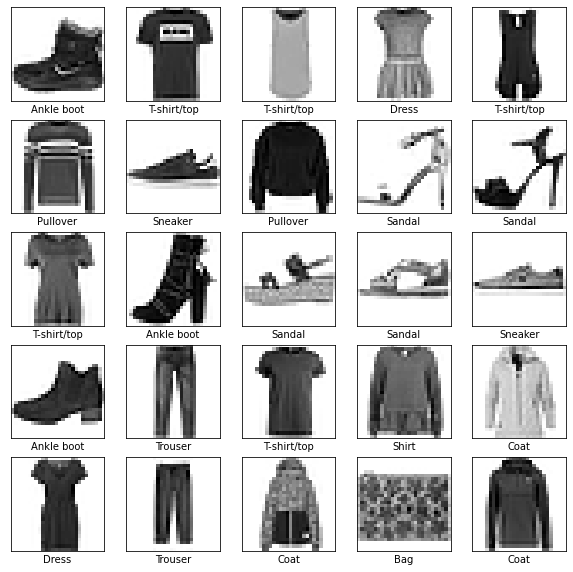

In [12]:
# tmenampilkan 25 gambar pertama dari training set dan menampilkan nama kelas di bawah dari tiap gambar
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
# Membangun model
# Pengaturan layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

 tf.keras.layers.Flatten, melakukan transformasi dari format gambar yang mulanya aray dua dimensi (28 x 28 pixel) menjadi aray satu dimensi (28 * 28 = 784 pixel). 
Setelah pixel diubah menjadi satu baris, model yang akan dibuat terdiri dari dua buah layer tf.keras.layers.Dense. Layer Dense yang pertama memiliki 128 node (atau neuron). Layer yang kedua  memiliki 10 node softmax yang mengembalikan sebuah array dari 10 nilai probabilitas yang apabila dijumlahkan hasilnya adalah 1. Setiap node memiliki score yang mengindikasikan probabilitas bahwa gambar yang sedang diproses merupakan 1 dari 10 kelas label.

In [14]:
# Proses kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

loss function — menghitung seberapa akurat model ketika proses training dilakukan. Meminimalisir nilai kerugian dari fungsi ini untuk "mengarahkan" model ke arah yang benar.
Optimizer — Optimizer mendefinisikan cara model untuk memperbarui modelnya berdasarkan data yang dilihat dan berdasarkan loss function-nya.
Metrics — memantau langkah-langkah dalam proses training dan testing. 

In [15]:
# Proses training dari model 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6357 - accuracy: 0.7792
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3902 - accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3106 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2992 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9028
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2442 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

Model ini mencapai akurasi sekitar 0.88 (atau 88%) terhadap data training

In [16]:
# Evaluasi nilai dari akurasi
# bandingkan bagaimana performansi dari model terhadap data test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3525 - accuracy: 0.8811

Test accuracy: 0.8810999989509583


akurasi dari data test  lebih kecil dibandingkan dengan akurasi model terhadap data training. Perbedaan antara akurasi dari data training dan data test memperlihatkan overfitting yaitu ketika performance  model machine learning lebih buruk pada data baru yang belum pernah dilihat sebelumnya dibandingkan dengan data training.

In [17]:
# Membuat prediksi
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([3.6419820e-08, 1.9323199e-09, 2.9341820e-09, 5.0490159e-09,
       8.5320295e-08, 1.2235201e-03, 1.2534892e-06, 8.0855489e-02,
       6.2336831e-08, 9.1791946e-01], dtype=float32)

Prediksi dari gambar pertama dalam data test adalah array dengan 10 angka. Prediksi ini memperlihatkan "confidence" dari model terhadap 10 jenis pakaian.

In [ ]:
#  label mana yang memiliki nilai confidence yang tinggi
np.argmax(predictions[0])

9

model memprediksi bahwa gambar tersebut adalah ankle boot, atau class_names[9]

In [20]:
test_labels[0]

9

Dengan meninjau label test, dapat dilihat bahwa klasifikasi ini benar

In [22]:
# melihat seluruh set dari prediksi 10 kelas
#Label prediksi yang tepat berwarna biru dan label prediksi yang salah akan berwarna merah.
# Bilangan yang ada memberikan presentase (dari 100) untuk label yang diprediksi.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

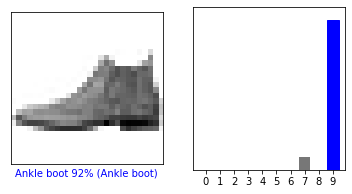

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

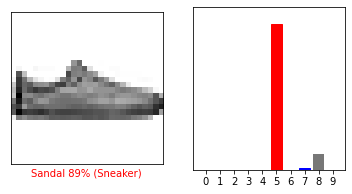

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

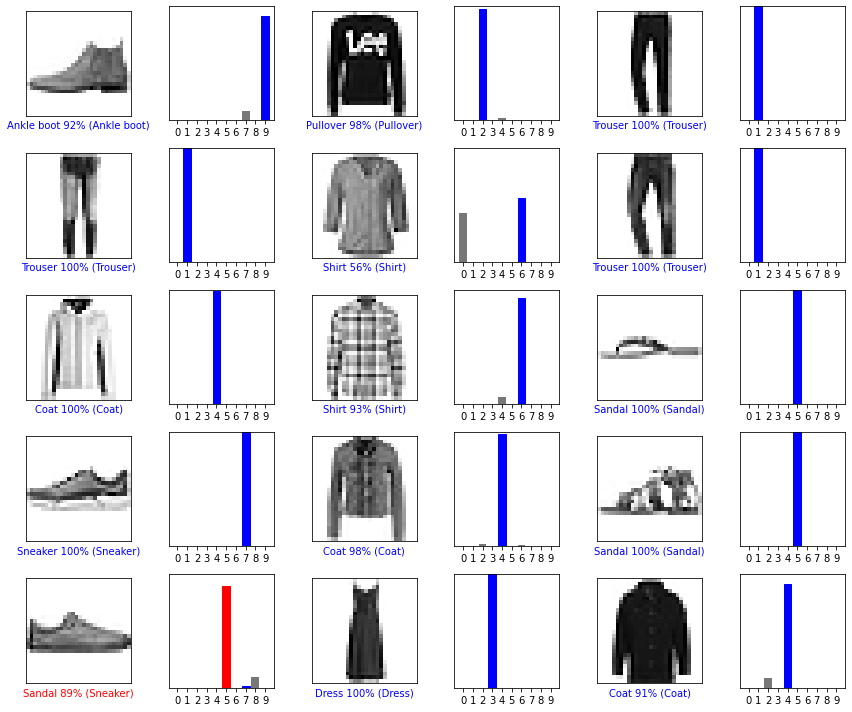

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# gunakan model yang telah dibuat untuk membuat prediksi terhadap sebuah gambar.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# menambahkan gambar tersebut ke dalam list
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
# prediksi label yang tepat untuk gambar
predictions_single = model.predict(img)

print(predictions_single)

[[1.8999088e-04 3.7635234e-10 9.7892898e-01 1.7991164e-10 2.0670898e-02
  3.4407360e-10 2.1017101e-04 6.5982289e-13 8.6451762e-10 1.8941652e-11]]


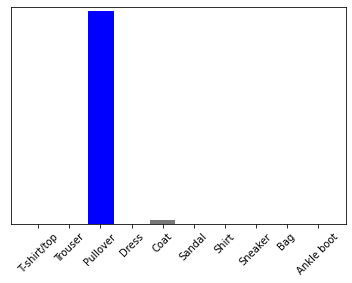

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2

model memprediksi label sesuai yang diharapkan